In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PreProcessing.VehicleDataPreprocessor import VehicleDataPreprocessor
from PreProcessing.FeatureSelector import FeatureSelector
from LinearModel.Scaler import StandardScaler
from LinearModel.Model import LinearRegression
from LinearModel.Optimizer import *
from Utils.Visualization import *
from Utils.Data_Preprocessing import *
from Utils.Metrics import *

# Chỉ sử dụng cho train_test_split
from sklearn.model_selection import train_test_split

import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Exploratory Data Analysis

## 1.1 Introduction

In [2]:
    df = pd.read_csv("Data/Final_Train.csv")
    processor = VehicleDataPreprocessor()
    df = processor.preprocess(df, train=True, norm=False)
    # featSelector = FeatureSelector(pre_process_df=df)
    # selected_features, df = featSelector.get_df(model_id=4)
    scaler = StandardScaler()

    y = df["Log_Price"]
    X = df.drop("Log_Price", axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=55)

    X_train = FeatureSelector._non_linearize_features(X_train)
    X_test = FeatureSelector._non_linearize_features(X_test)

    _, X_train = FeatureSelector.get_df(
        X_train, model_id=1, get_Log_Price=False)
    _, X_test = FeatureSelector.get_df(X_test, model_id=1, get_Log_Price=False)

    X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(
    ), y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [3]:
X_train.shape, y_train.shape

((1310, 21), (1310,))

In [4]:
X_test.shape, y_test.shape

((328, 21), (328,))

# 2. Building and Training Model

## 2.1 Building Model

## 2.2 Training Model

Có 5 phương pháp để train model (Chi tiết về các phương pháp bọn em sẽ viết trong báo cáo):

* Sử dụng Normal Equation

* Sử dụng Gradient Descent

* Sử dụng Stochastic Gradient Descent

* Sử dụng Mini-Batch Gradient Descent

* Sử dụng Adam Optimizer


=== Huấn luyện bằng Normal Equation ===
Initial weights: [-1.10388823e-02 -1.67035421e-02  3.02246468e-03 -1.23177511e-02
 -1.16189919e-02 -1.42623432e-02  5.29434451e-03  3.55100690e-03
  7.02595594e-03  9.98199864e-03  1.30028161e-03  1.13597254e-03
  8.82425447e-03 -8.24071797e-03 -6.18881058e-04  4.31965366e-03
 -6.02523529e-03 -6.81181119e-05  1.82652181e-02 -1.05305110e-02
  5.31702004e-03]
X: [[-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912195 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 ...
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]]
W: [-5.05306966e+07  2.44169008e+07  3.35286819e+07  1.79615880e+06
  1.27011992e+08  4.27250128e+06 -4.

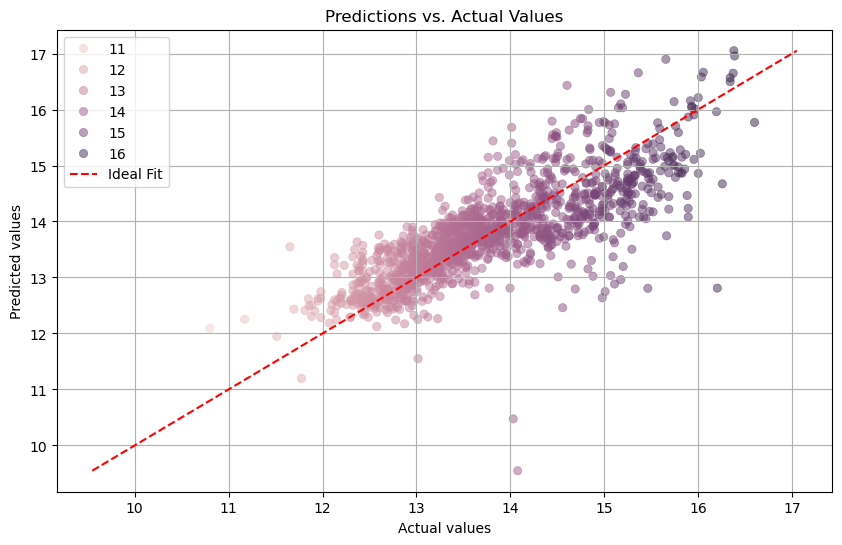

In [5]:
# Huấn luyện với normal equation

print("\n=== Huấn luyện bằng Normal Equation ===")
model1 = LinearRegression(optimizer='normal_equation')
model1.fit(X_train, y_train, verbose=False)
model1.evaluate(X_test, y_test)
y_pred = model1.predict(X_train)
# mean_score, _ = model1.cross_validate(X_train, y_train)
# print("Mean score of cross validation:", mean_score)

visualize_results(X_train, y_train, y_pred)


=== Huấn luyện bằng Gradient Descent ===
Initial weights: [ 0.00691849 -0.00573138 -0.0031326   0.00942134  0.00855692  0.00351975
  0.0009719  -0.01095019 -0.00090192 -0.00291143 -0.01328225 -0.00655017
 -0.00071772  0.00925822 -0.01203426 -0.00311816 -0.01005666 -0.00564984
 -0.01206627  0.01342884 -0.00125789]
X: [[-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912195 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 ...
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]]
W: [ 0.00691849 -0.00573138 -0.0031326   0.00942134  0.00855692  0.00351975
  0.0009719  -0.01095019 -0.00090192 -0.00291143 -0.01328225 -0.00655017
 -0.00071772  0.00925822 -0.01203426 -0.

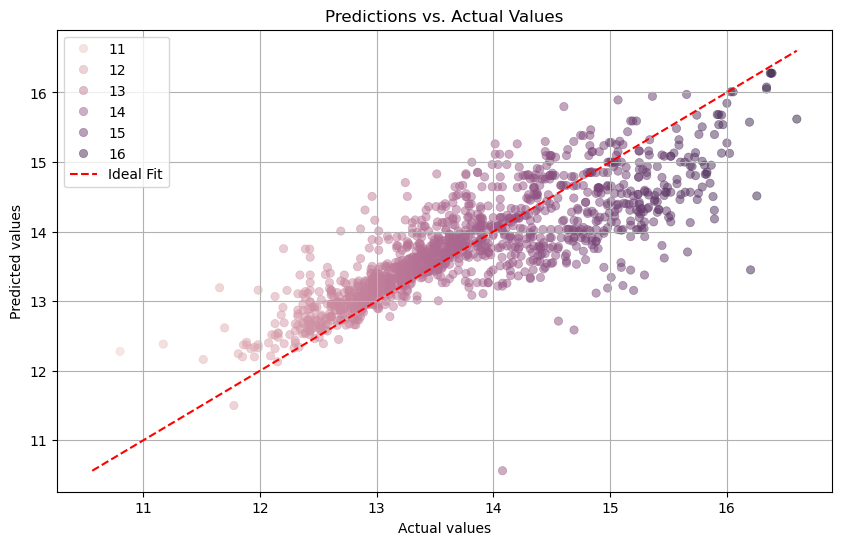

In [6]:
# Huấn luyện với gradient descent

print("\n=== Huấn luyện bằng Gradient Descent ===")
model2 = LinearRegression(optimizer='gradient_descent', learning_rate=0.05, n_iterations = 10000)
model2.fit(X_train, y_train, verbose=False)
model2.evaluate(X_test, y_test)
y_pred = model2.predict(X_train)

visualize_results(X_train, y_train, y_pred)


=== Huấn luyện bằng Stochastic Gradient Descent ===
Initial weights: [ 0.00038874 -0.00400404  0.00603006  0.00598723  0.00117457  0.00368368
  0.01001436 -0.00337146 -0.00240194  0.01040407  0.00570125 -0.01766241
 -0.00499545 -0.01122325  0.01810296  0.0244629   0.00669822  0.00132848
  0.01683425  0.00259023  0.00488478]
X: [[-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912195 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 ...
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]
 [-0.22912196 -0.22912196 -0.22912196 ... -0.22912196 -0.22912196
  -0.22912196]]
W: [-0.6142246  -0.61861162 -0.60859066 -0.60863244 -0.61343979 -0.61092942
 -0.60461144 -0.61797987 -0.61701161 -0.60422238 -0.60891903 -0.63225165
  0.65232218  1.67468795 -0.5

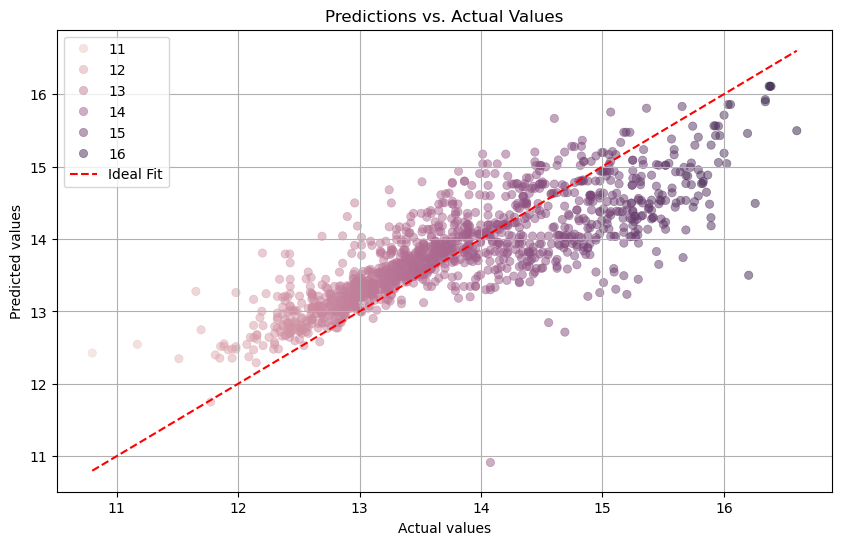

In [ ]:
# Huấn luyện với stochastic gradient descent
print("\n=== Huấn luyện bằng Stochastic Gradient Descent ===")
model3 = LinearRegression(optimizer='sgd', learning_rate=0.001, regularization = "l2", lambda_param = 0.001, max_iter=1000, batch_size=16)
model3.fit(X_train, y_train, verbose=False)
y_pred = model3.predict(X_train)

visualize_results(X_train, y_train, y_pred)


=== Huấn luyện bằng Adam ===
Initial weights: [ 0.1171165   0.14980325  0.33716049 -0.17006076 -0.28815517 -0.16015557
  0.06837584  0.12842076  0.26527281  0.29188711 -0.03941532  0.60624756
 -0.0104604   0.01813385  0.06776473  0.18956946  0.13442706 -0.322758
  0.14396836 -0.09754868  0.28784639]

Optimization finished after 1000 iterations.
Final Cost: 0.1536
Kết quả đánh giá:
MSE: 0.292980
RMSE: 0.541277
MAE: 0.399460
R²: 0.667215
MAE exp: 714917.906228
Plotting Predicted vs Actual (multi-feature input)


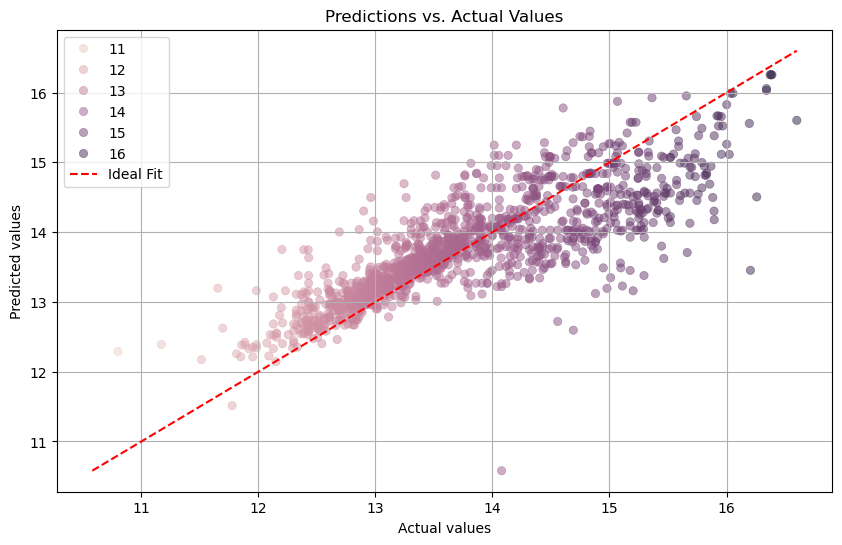

In [ ]:
# Huấn luyện với Adam
print("\n=== Huấn luyện bằng Adam ===")
model4 = LinearRegression(optimizer='adam', learning_rate=0.1, n_iterations=1000, tol=1e-34)
model4.fit(X_train, y_train, verbose=False)
model4.evaluate(X_test, y_test)

y_pred = model4.predict(X_train)
visualize_results(X_train, y_train, y_pred)

# 3. Model Evaluation

In [21]:
print("=== Mô hình 1 ===")
model1.evaluate(X_test, y_test)

print("\n\n=== Mô hình 2 ===")
model2.evaluate(X_test, y_test)

print("\n\n=== Mô hình 3 ===")
model3.evaluate(X_test, y_test)

print("\n\n=== Mô hình 4 ===")
model4.evaluate(X_test, y_test)

=== Mô hình 1 ===
Kết quả đánh giá:
MSE: 2399.584315
RMSE: 48.985552
MAE: 48.969920
R²: -893992.554115
MAE exp: 1639685.929878


=== Mô hình 2 ===
Kết quả đánh giá:
MSE: 0.292266
RMSE: 0.540616
MAE: 0.398219
R²: 0.668027
MAE exp: 714522.740448


=== Mô hình 3 ===
Kết quả đánh giá:
MSE: 0.299211
RMSE: 0.547002
MAE: 0.418065
R²: 0.660138
MAE exp: 726365.272997


=== Mô hình 4 ===
Kết quả đánh giá:
MSE: 0.292524
RMSE: 0.540855
MAE: 0.398657
R²: 0.667733
MAE exp: 714644.539468


{'MSE': np.float64(0.29252438634751843),
 'RMSE': np.float64(0.5408552360359641),
 'MAE': np.float64(0.39865730195190274),
 'R²': np.float64(0.6677334621581978),
 'MAE exp': np.float64(714644.5394675579)}